In [3]:
import tools
import pandas as pd
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt

# Constant definitions
fribourg = '175'
basel = '081'
aigle = '250'
camorino = '780'
lugano = '507'
payerne = '222'

In [4]:

station_id = fribourg


In [5]:

# Load trafic data from 2018 to 2023
trafic_loader = tools.Tools("data/raw/ASTRA_Bulletins_2018-2023")
traffic_df = trafic_loader.load_traffic_data(station_id)
# append to this df the data from the folder "data/raw/ASTRA_Bulletins_pre_2018"
trafic_loader = tools.Tools("data/raw/ASTRA_Bulletins_pre_2018")
traffic_df_pre_2018 = trafic_loader.load_traffic_data_pre_2018(station_id)
traffic_df = pd.concat([traffic_df_pre_2018, traffic_df], ignore_index=True)
print(traffic_df.head())
print("Trafic data loaded successfully")


Looking for files in: data/raw/ASTRA_Bulletins_2018-2023
Excel files: ['data/raw/ASTRA_Bulletins_2018-2023/ID24_Bulletin_2019_de.xlsx', 'data/raw/ASTRA_Bulletins_2018-2023/ID21_Bulletin_2022_de.xlsx', 'data/raw/ASTRA_Bulletins_2018-2023/ID25_Bulletin_2018_de.xlsx', 'data/raw/ASTRA_Bulletins_2018-2023/ID23_Bulletin_2020_12_de.xlsx', 'data/raw/ASTRA_Bulletins_2018-2023/ID20_Bulletin_2023_de.xlsx', 'data/raw/ASTRA_Bulletins_2018-2023/ID22_Jahresergebnisse 2021.xlsx']
Read Excel succesful: data/raw/ASTRA_Bulletins_2018-2023/ID24_Bulletin_2019_de.xlsx
Read Excel succesful: data/raw/ASTRA_Bulletins_2018-2023/ID21_Bulletin_2022_de.xlsx
Read Excel succesful: data/raw/ASTRA_Bulletins_2018-2023/ID25_Bulletin_2018_de.xlsx
Read Excel succesful: data/raw/ASTRA_Bulletins_2018-2023/ID23_Bulletin_2020_12_de.xlsx
Read Excel succesful: data/raw/ASTRA_Bulletins_2018-2023/ID20_Bulletin_2023_de.xlsx
Read Excel succesful: data/raw/ASTRA_Bulletins_2018-2023/ID22_Jahresergebnisse 2021.xlsx
Looking for files i

In [6]:
# Load air data
if station_id == fribourg:
    air_df_pm10 = tools.Tools.load_FR_air_data("data/raw/FR_air/PM10")
    air_df_pm10 = air_df_pm10.rename(columns={"Value": "PM10"})
    print("PM10 Data loaded successfully")
    air_df_NO2 = tools.Tools.load_FR_air_data("data/raw/FR_air/NO2")
    air_df_NO2 = air_df_NO2.rename(columns={"Value": "NO2"})
    print("NO2 Data loaded successfully")
    air_df_O3 = tools.Tools.load_FR_air_data("data/raw/FR_air/O3")
    air_df_O3 = air_df_O3.rename(columns={"Value": "O3"})
    print("O3 Data loaded successfully")
    
    df = traffic_df.rename(columns={"Trafic": "Traffic"})  # fix name first
    df = pd.merge(df, air_df_pm10, on="Date", how="left")
    df = pd.merge(df, air_df_NO2, on="Date", how="left")
    df = pd.merge(df, air_df_O3, on="Date", how="left")


elif station_id == basel:
    air_df_pm10 = tools.Tools.load_BASEL_air_data_PM10("data/raw/BASEL_air/Luft_PM10-PM25-NO2_01012000.csv")
    print("PM10 loaded successfully")
    air_df_pm25 = tools.Tools.load_BASEL_air_data_PM25("data/raw/BASEL_air/Luft_PM10-PM25-NO2_01012000.csv")
    print("PM25 loaded successfully")
    air_df_NO2 = tools.Tools.load_BASEL_air_data_NO2("data/raw/BASEL_air/Luft_PM10-PM25-NO2_01012000.csv")
    print("NO2 loaded successfully")
    traffic_df = traffic_df.rename(columns={"Value (PM10 [µg/m³])": "MP10", "Value (PM2.5 [µg/m³])": "MP25", "Value (NO2 [µg/m³])": "NO2"})  # fix name first
    
    df = traffic_df.rename(columns={"Trafic": "Traffic"})  # fix name first
    df = pd.merge(df, air_df_pm10, on="Date", how="left")
    df = pd.merge(df, air_df_pm25, on="Date", how="left")
    df = pd.merge(df, air_df_NO2, on="Date", how="left")

elif station_id == aigle:
    air_df_pm10 = tools.Tools.load_AIGLE_air_data("data/raw/AIGLE_air/PM10")
    air_df_pm10 = air_df_pm10.rename(columns={"Value": "PM10"})
    print("PM10 Data loaded successfully")
    air_df_NO2 = tools.Tools.load_AIGLE_air_data("data/raw/AIGLE_air/NO2")
    air_df_NO2 = air_df_NO2.rename(columns={"Value": "NO2"})
    print("NO2 Data loaded successfully")
    air_df_O3 = tools.Tools.load_AIGLE_air_data("data/raw/AIGLE_air/O3")
    air_df_O3 = air_df_O3.rename(columns={"Value": "O3"})
    print("O3 Data loaded successfully")
    
    df = traffic_df.rename(columns={"Trafic": "Traffic"})  # fix name first
    df = pd.merge(df, air_df_pm10, on="Date", how="left")
    df = pd.merge(df, air_df_NO2, on="Date", how="left")
    df = pd.merge(df, air_df_O3, on="Date", how="left")

elif station_id == payerne:
    air_df_CO = pd.read_csv('data/raw/ID38_CO.csv', delimiter=';', skiprows=6, names=["Date", "Lausanne", "Lugano", "Payerne"], parse_dates=["Date"])
    air_df_CO['Date'] = pd.to_datetime(air_df_CO['Date'], dayfirst=True, errors='coerce')  # handle odd formats
    air_df_CO = air_df_CO.drop(columns=["Lausanne", "Lugano"])  # drop Lausanne and Lugano columns
    air_df_CO = air_df_CO.rename(columns={"Payerne": "CO (mg/m³)"})

    df = traffic_df.rename(columns={"Trafic": "Traffic"})  # fix name first
    df = pd.merge(df, air_df_CO, on="Date", how="left")
    
elif station_id == lugano:
    air_df_CO = pd.read_csv('data/raw/ID38_CO.csv', delimiter=';', skiprows=6, names=["Date", "Lausanne", "Lugano", "Payerne"], parse_dates=["Date"])
    air_df_CO['Date'] = pd.to_datetime(air_df_CO['Date'], dayfirst=True, errors='coerce')  # handle odd formats
    air_df_CO = air_df_CO.drop(columns=["Lausanne", "Payerne"])  # drop Lausanne and Lugano columns
    air_df_CO = air_df_CO.rename(columns={"Lugano": "CO (mg/m³)"})

    df = traffic_df.rename(columns={"Trafic": "Traffic"})  # fix name first
    df = pd.merge(df, air_df_CO, on="Date", how="left")
    
    

print(df.head())
print("Data merged successfully")

        Date  Value
0 2020-01-01  14.70
1 2020-01-02  18.02
2 2020-01-03  22.01
3 2020-01-04   9.95
4 2020-01-05  12.43
PM10 Data loaded successfully
        Date  Value
0 2004-12-09  32.75
1 2004-12-10  32.16
2 2004-12-11  30.42
3 2004-12-12  32.74
4 2004-12-13  36.64
NO2 Data loaded successfully
        Date  Value
0 2008-01-01  19.96
1 2008-01-02  36.01
2 2008-01-03  11.66
3 2008-01-04   2.73
4 2008-01-05  17.29
O3 Data loaded successfully
        Date       Traffic   PM10    NO2     O3
0 2008-01-31  28934.483871  37.19  45.06  22.37
1 2008-02-29  31985.758621  17.48  37.66  36.48
2 2008-03-31  31887.677419    NaN  48.41    NaN
3 2008-04-30  31321.800000  16.10  51.44  44.25
4 2008-05-31  29567.774194  10.44  28.83  47.78
Data merged successfully


In [7]:
# EDA
profile = ProfileReport(df,
                        title=f"{station_id}_EDA_Report",
                        explorative=True,
                        correlations={
                            "spearman": {"calculate": True},
                            "pearson": {"calculate": True}
                        })
profile.to_file(f"EDA reports/{station_id}_EDA_Report.html")
print("EDA report generated successfully")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 58416.49it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

EDA report generated successfully


In [8]:
print(df.columns)
print(df['Date'].dtype)
print("Length of the dataframe: ", len(df))

Index(['Date', 'Traffic', 'PM10', 'NO2', 'O3'], dtype='object')
datetime64[ns]
Length of the dataframe:  194


array([[<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>]], dtype=object)

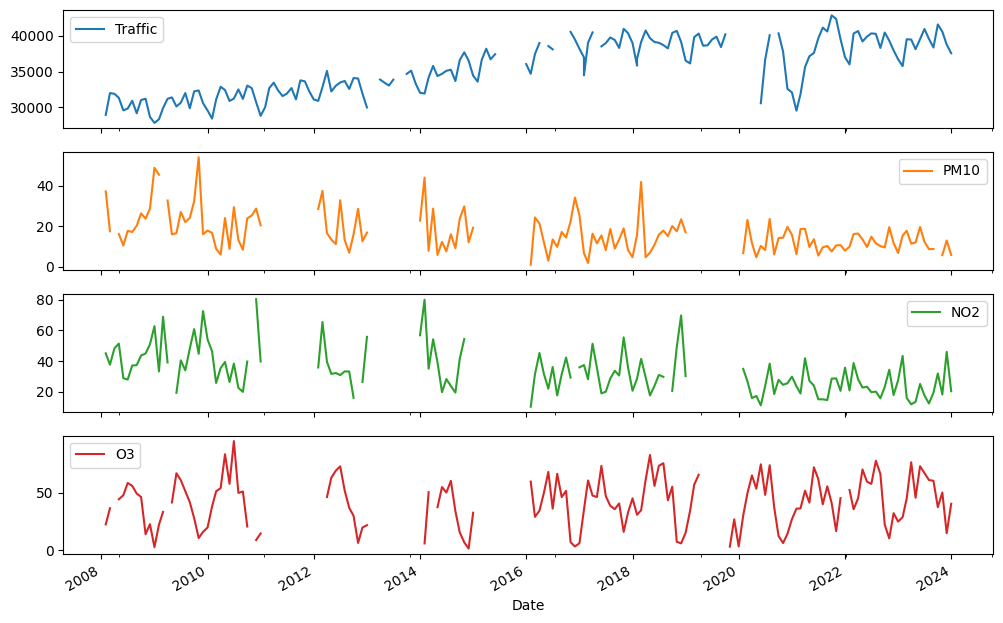

In [9]:
import matplotlib.dates as mdates
df.plot(x="Date", y=[col for col in df.columns if col != 'Date'], subplots=True, layout=(len(df.columns)-1, 1), figsize=(12, 8))



In [10]:
#### Handle missing data in 'Date' column
print(f"Dataset length before handling missing dates: {len(df)}")
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop_duplicates(subset='Date')
full_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='ME') 
df = df.set_index('Date')
df = df.reindex(full_range)
df = df.reset_index().rename(columns={'index': 'Date'})  # Rename the index column back to 'Date'
print(f"Dataset length AFTER  handling missing dates: {len(df)}, from {df['Date'].min()} to {df['Date'].max()}")


Dataset length before handling missing dates: 194
Dataset length AFTER  handling missing dates: 192, from 2008-01-31 00:00:00 to 2023-12-31 00:00:00


#### Interpolate using prophet as univariate prediction model on each column

In [11]:
from prophet import Prophet

def interpolate_with_prophet(df, colname):
    # comment out to make it work
    full_dates = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='ME')
    df_prophet = pd.DataFrame({'ds': full_dates, 'y': df[colname]})
    
    df_prophet = df[['Date', colname]].rename(columns={'Date': 'ds', colname: 'y'})
    df_prophet = df_prophet.drop_duplicates(subset='ds')
    model = Prophet(yearly_seasonality=True, daily_seasonality=False)
    model.fit(df_prophet)

    
    
    future = model.make_future_dataframe(periods=0)  # Just reconstruct existing data
    forecast = model.predict(future)

    # Merge predictions back
    df_out = df.copy()
    df_out[f'{colname}_interpolated'] = df_out[colname].fillna(forecast['yhat'])
    return df_out[[f'{colname}_interpolated']]



In [12]:
# not afilling date
print("Columns befor interpolation: ", df.columns)
df = df.sort_values('Date')  # Ensure date order
for col in df.columns:
    if col == 'Date':
        continue
    interp_col = interpolate_with_prophet(df, col)
    df = pd.concat([df, interp_col], axis=1)
print("Columns after interpolation: ", df.columns)


15:51:29 - cmdstanpy - INFO - Chain [1] start processing
15:51:30 - cmdstanpy - INFO - Chain [1] done processing
15:51:30 - cmdstanpy - INFO - Chain [1] start processing
15:51:30 - cmdstanpy - INFO - Chain [1] done processing


Columns befor interpolation:  Index(['Date', 'Traffic', 'PM10', 'NO2', 'O3'], dtype='object')


15:51:30 - cmdstanpy - INFO - Chain [1] start processing
15:51:30 - cmdstanpy - INFO - Chain [1] done processing
15:51:30 - cmdstanpy - INFO - Chain [1] start processing
15:51:30 - cmdstanpy - INFO - Chain [1] done processing


Columns after interpolation:  Index(['Date', 'Traffic', 'PM10', 'NO2', 'O3', 'Traffic_interpolated',
       'PM10_interpolated', 'NO2_interpolated', 'O3_interpolated'],
      dtype='object')


KeyError: 'CO (mg/m³)_interpolated'

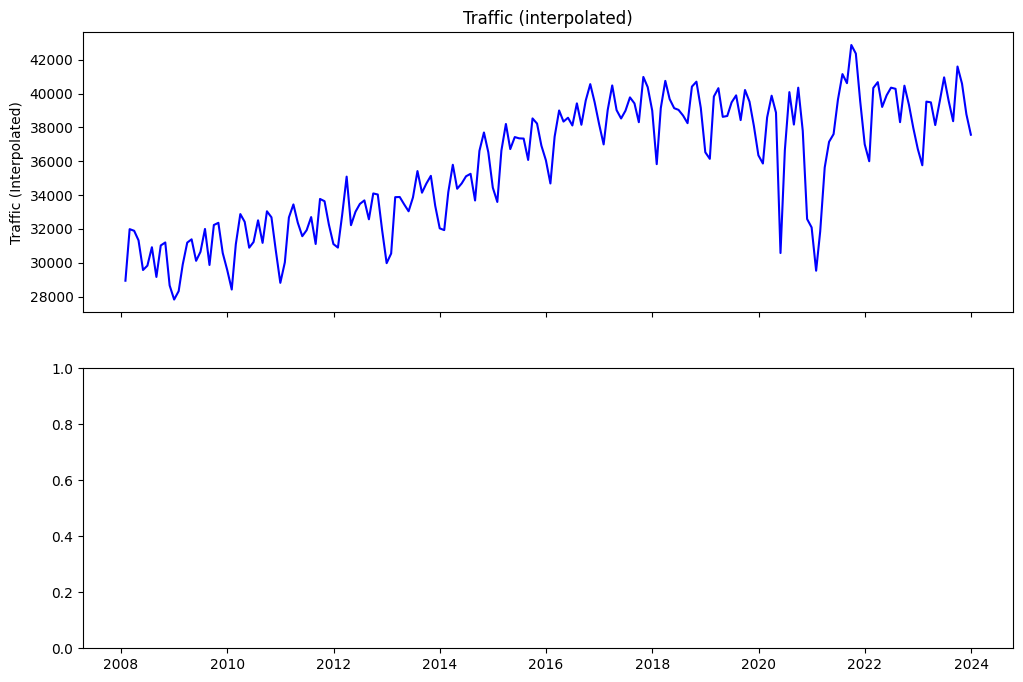

In [ ]:
# Create subplots: 2 rows, 1 column
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot Traffic_interpolated
axes[0].plot(df['Date'], df['Traffic_interpolated'], color='blue')
axes[0].set_ylabel('Traffic (Interpolated)')
axes[0].set_title('Traffic (interpolated)')

# Plot CO (mg/m³)_interpolated
# axes[1].plot(df['Date'], df['CO (mg/m³)_interpolated'], color='orange')
# axes[1].set_ylabel('CO (mg/m³) (Interpolated)')
# axes[1].set_title('CO (mg/m³) (interpolated)')

array([[<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>]], dtype=object)

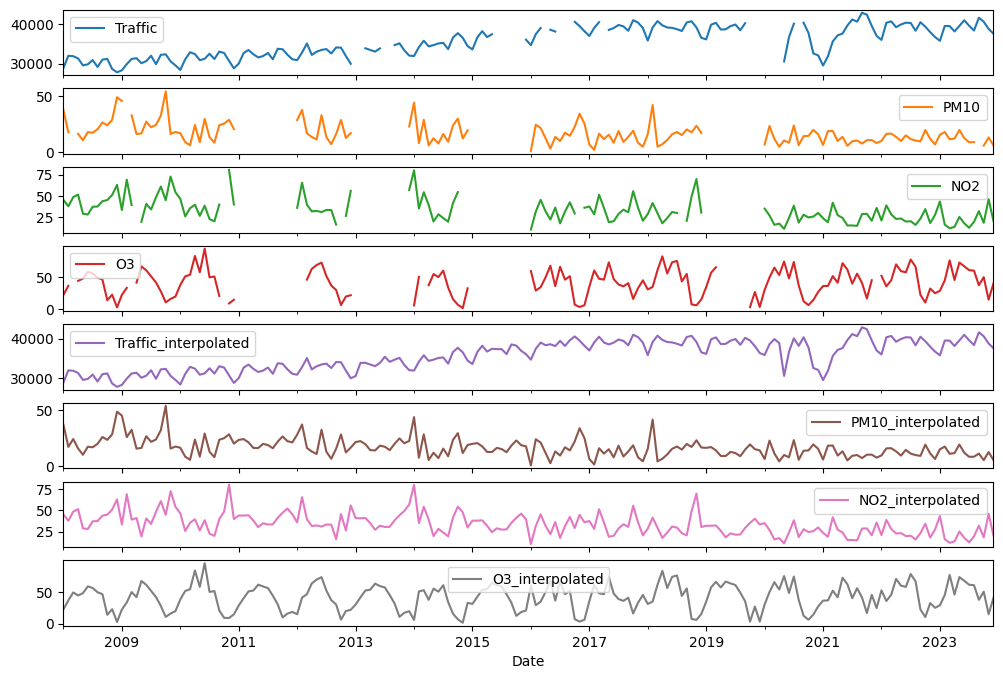

In [15]:
df.plot(x="Date", y=[col for col in df.columns if col != 'Date'], subplots=True, layout=(len(df.columns)-1, 1), figsize=(12, 8))

In [ ]:
# df.plot(x="Date", y=['Traffic_interpolated',
#      'CO (mg/m³)_interpolated'], subplots=True, layout=(4, 1), figsize=(10, 10))
df.set_index('Date', inplace=True)
df_resampled = df.resample('M').mean() 

# Plot your data
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the interpolated data
ax.plot(df_resampled.index, df_resampled[['Traffic_interpolated',
       'CO (mg/m³)_interpolated']])


# Set x-axis to show Date properly
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Use MonthLocator for monthly intervals
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month
ax.tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
# EXPORT the dataframe to a csv file
df.to_csv(f"data/processed/interpolated_complete_{station_id}.csv", index=False)

In [14]:
#df2 = pd.read_csv(f"data/processed/interpolated_complete_{station_id}.csv")
df2 = pd.read_csv(f"data/processed/interpolated_complete_lugano.csv")
print(df2.columns)


Index(['Date', 'Traffic', 'CO (mg/m³)', 'Traffic_interpolated',
       'CO (mg/m³)_interpolated'],
      dtype='object')


array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>]], dtype=object)

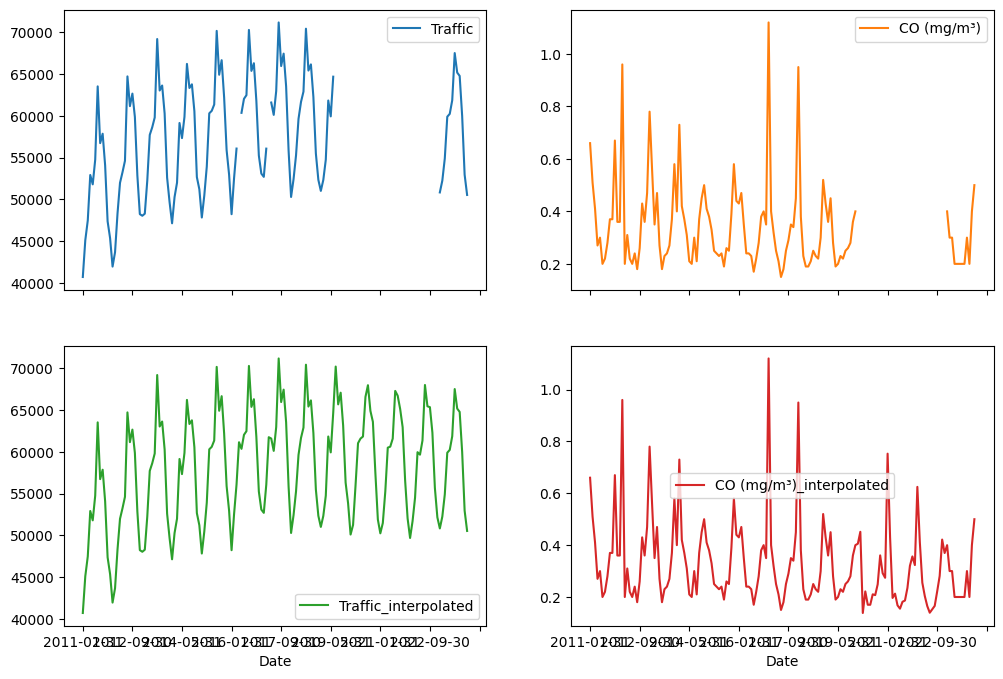

In [15]:
#plot
df2.plot(x="Date", y=[col for col in df.columns if col != 'Date'], subplots=True, layout=(len(df2.columns)-3, len(df2.columns)-3), figsize=(12, 8))

In [ ]:
df2.plot(x="Date", y=["Traffic", "PM10", "NO2", "O3"], subplots=True, layout=(4, 1), figsize=(10, 10))